In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from scipy.spatial import Voronoi, voronoi_plot_2d

sns.set_style("dark")

## Generate data

In [181]:
n_samples = 5000
n_centers = 100
n_features = 2
cluster_std = 0.5

X, y, centers = make_blobs(n_samples=n_samples, 
                           centers=n_centers, 
                           n_features=n_features, 
                           return_centers=True,
                           cluster_std = cluster_std,
                           random_state=456)

### Scaling axis

In [182]:
X[:, 0] = X[:, 0] * 2
centers[:, 0] = centers[:, 0] * 2

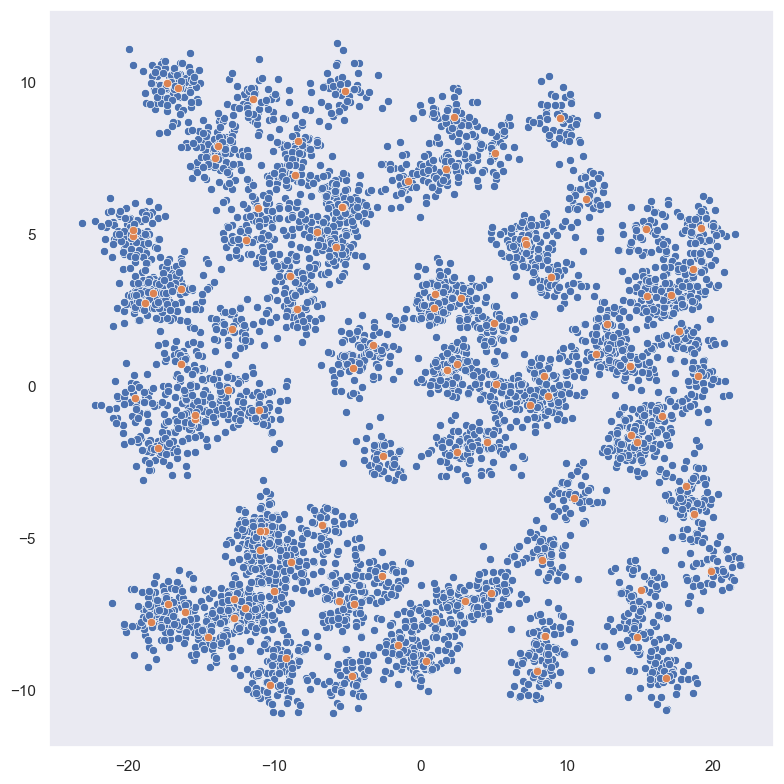

In [183]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], ax=ax)
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], ax=ax)

plt.tight_layout()
plt.show()

In [184]:
kmeans = KMeans(n_clusters=n_centers, n_init='auto', random_state=8998) 
kmeans.fit(X) 
y_kmeans = kmeans.predict(X)

# cluster index for each observation 
km_centers = kmeans.cluster_centers_ 


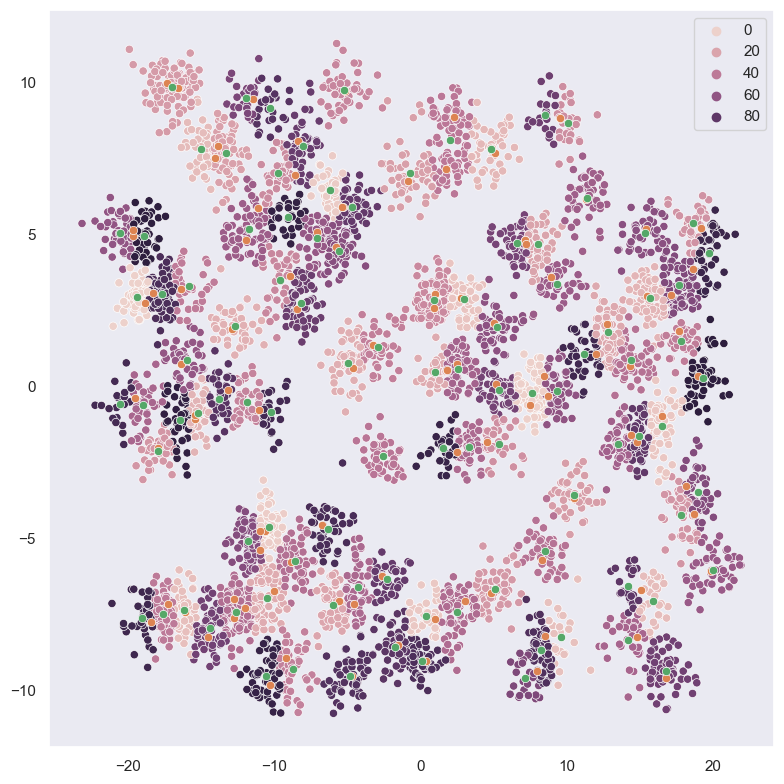

In [185]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmeans, ax=ax)
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], ax=ax)
sns.scatterplot(x=km_centers[:, 0], y=km_centers[:, 1], ax=ax)

plt.tight_layout()
plt.show()

### Make Voronoi object

In [186]:
vor1 = Voronoi(centers)
vor2 = Voronoi(km_centers)

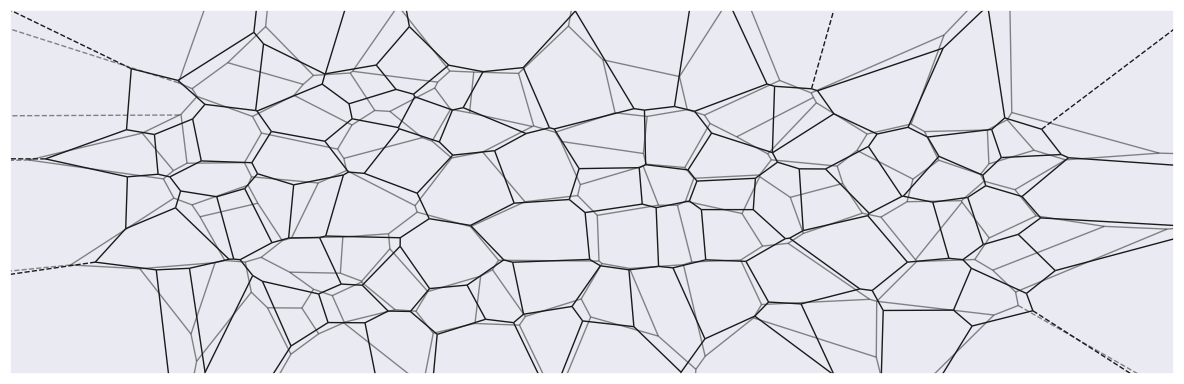

In [188]:
fig, ax = plt.subplots(figsize=(12, 4))
# sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmeans, legend=False, ax=ax)
voronoi_plot_2d(vor1, show_points=False, show_vertices=False, line_alpha=0.5, ax=ax)
voronoi_plot_2d(vor2, show_points=False, show_vertices=False, ax=ax)

plt.xticks([]) 
plt.yticks([])
plt.tight_layout()
plt.show()